In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart_disease_uci.csv
/kaggle/input/heart-disease-data/heart_disease_uci.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head(20)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [4]:
print(df.shape)

(920, 16)


we have a 920 person and 16 attribute

In [5]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


id: Unique id for each patient

age:Age of the patient in years

dataset: place of study

sex: Male/Female

cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol: serum cholesterol in mg/dl

fbs: if fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute

In [6]:
df.rename(columns={
    "cp": "chest_pain_type",
    "trestbps": "resting_blood_pressure",
    "chol": "serum_cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_ecg_results",
    "thalch": "max_heart_rate",
    "exang": "exercise_induced_angina",
    "oldpeak": "depression_induced_by_exercise",
    "ca" : "number_of_major_vessels",
    "thal" : "thalassemia",
    "num": "heart_disease"}, inplace=True)
df.head(10)

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,number_of_major_vessels,thalassemia,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [7]:
df.dtypes

id                                  int64
age                                 int64
sex                                object
dataset                            object
chest_pain_type                    object
resting_blood_pressure            float64
serum_cholesterol                 float64
fasting_blood_sugar                object
resting_ecg_results                object
max_heart_rate                    float64
exercise_induced_angina            object
depression_induced_by_exercise    float64
slope                              object
number_of_major_vessels           float64
thalassemia                        object
heart_disease                       int64
dtype: object

In [8]:
df.describe()

,id,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,depression_induced_by_exercise,number_of_major_vessels,heart_disease
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
df.describe(include='object')

,sex,dataset,chest_pain_type,fasting_blood_sugar,resting_ecg_results,exercise_induced_angina,slope,thalassemia
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              920 non-null    int64  
 1   age                             920 non-null    int64  
 2   sex                             920 non-null    object 
 3   dataset                         920 non-null    object 
 4   chest_pain_type                 920 non-null    object 
 5   resting_blood_pressure          861 non-null    float64
 6   serum_cholesterol               890 non-null    float64
 7   fasting_blood_sugar             830 non-null    object 
 8   resting_ecg_results             918 non-null    object 
 9   max_heart_rate                  865 non-null    float64
 10  exercise_induced_angina         865 non-null    object 
 11  depression_induced_by_exercise  858 non-null    float64
 12  slope                           611 

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                                  0
age                                 0
sex                                 0
dataset                             0
chest_pain_type                     0
resting_blood_pressure             59
serum_cholesterol                  30
fasting_blood_sugar                90
resting_ecg_results                 2
max_heart_rate                     55
exercise_induced_angina            55
depression_induced_by_exercise     62
slope                             309
number_of_major_vessels           611
thalassemia                       486
heart_disease                       0
dtype: int64

In [13]:
df.drop(['number_of_major_vessels'],inplace=True,axis=1)

In [14]:
df['thalassemia']=df['thalassemia'].fillna(df['thalassemia'].mode()[0])

In [15]:
df['slope']=df['slope'].fillna(df['slope'].mode()[0])

In [16]:
df['depression_induced_by_exercise']=df['depression_induced_by_exercise'].fillna(df['depression_induced_by_exercise'].median())

In [17]:
df=df.dropna(subset=['exercise_induced_angina'])

In [18]:
df['max_heart_rate']=df['max_heart_rate'].fillna(df['max_heart_rate'].median())

In [19]:
df['resting_ecg_results']=df['resting_ecg_results'].fillna(df['resting_ecg_results'].mode()[0])

In [20]:
df['fasting_blood_sugar']=df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode())

In [21]:
df['exercise_induced_angina']=df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode())

/tmp/ipykernel_36/1345133082.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exercise_induced_angina']=df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode())


In [22]:
df['serum_cholesterol']=df['serum_cholesterol'].fillna(df['serum_cholesterol'].median())

In [23]:
df['resting_blood_pressure']=df['resting_blood_pressure'].fillna(df['resting_blood_pressure'].median())

In [24]:

df['fasting_blood_sugar']=df['fasting_blood_sugar'].apply(lambda x:1 if x==1 else 0)

In [25]:
df['sex'] = df['sex'].replace({'Male': 'M', 'Female': 'F'})
df['dataset'] = df['dataset'].replace({'Cleveland':'cle',
'Hungary':'Hun',
'VA Long Beach':'va',
'Switzerland':'suiss'})
df['chest_pain_type'] = df['chest_pain_type'].replace({'typical angina':'TA', 'atypical angina':'ATA','non-anginal':'NA', 'asymptomatic':'ASY'})
df['resting_ecg_results'] = df['resting_ecg_results'].replace({'lv hypertrophy': 'lv', 'normal': 'normal','st-t abnormality':'ST'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({'Y': 'Yes','N': 'No'})
df['thalassemia'] = df['thalassemia'].replace({'normal':'normal',
'reversable defect':'rev',
'fixed defect':'fix'})
df['slope'] = df['slope'].replace({'Up': 'upsloping', 'Flat': 'flat', 'Down': 'downsloping'})

In [26]:
df.head(10)

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,thalassemia,heart_disease
0,1,63,M,cle,TA,145.0,233.0,1,lv,150.0,False,2.3,downsloping,fix,0
1,2,67,M,cle,ASY,160.0,286.0,0,lv,108.0,True,1.5,flat,normal,2
2,3,67,M,cle,ASY,120.0,229.0,0,lv,129.0,True,2.6,flat,rev,1
3,4,37,M,cle,NA,130.0,250.0,0,normal,187.0,False,3.5,downsloping,normal,0
4,5,41,F,cle,ATA,130.0,204.0,0,lv,172.0,False,1.4,upsloping,normal,0
5,6,56,M,cle,ATA,120.0,236.0,0,normal,178.0,False,0.8,upsloping,normal,0
6,7,62,F,cle,ASY,140.0,268.0,0,lv,160.0,False,3.6,downsloping,normal,3
7,8,57,F,cle,ASY,120.0,354.0,0,normal,163.0,True,0.6,upsloping,normal,0
8,9,63,M,cle,ASY,130.0,254.0,0,lv,147.0,False,1.4,flat,rev,2
9,10,53,M,cle,ASY,140.0,203.0,1,lv,155.0,True,3.1,downsloping,rev,1


In [27]:
df.isnull().sum()

id                                0
age                               0
sex                               0
dataset                           0
chest_pain_type                   0
resting_blood_pressure            0
serum_cholesterol                 0
fasting_blood_sugar               0
resting_ecg_results               0
max_heart_rate                    0
exercise_induced_angina           0
depression_induced_by_exercise    0
slope                             0
thalassemia                       0
heart_disease                     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              865 non-null    int64  
 1   age                             865 non-null    int64  
 2   sex                             865 non-null    object 
 3   dataset                         865 non-null    object 
 4   chest_pain_type                 865 non-null    object 
 5   resting_blood_pressure          865 non-null    float64
 6   serum_cholesterol               865 non-null    float64
 7   fasting_blood_sugar             865 non-null    int64  
 8   resting_ecg_results             865 non-null    object 
 9   max_heart_rate                  865 non-null    float64
 10  exercise_induced_angina         865 non-null    bool   
 11  depression_induced_by_exercise  865 non-null    float64
 12  slope                           865 non-n

In [29]:
print(df['chest_pain_type'].value_counts())

chest_pain_type
ASY    470
NA     186
ATA    167
TA      42
Name: count, dtype: int64


In [30]:
print(df['thalassemia'].value_counts())

thalassemia
normal    629
rev       190
fix        46
Name: count, dtype: int64


In [31]:
print(df['slope'].value_counts())

slope
flat           600
upsloping      202
downsloping     63
Name: count, dtype: int64


In [32]:
print(df['exercise_induced_angina'].value_counts())

exercise_induced_angina
False    528
True     337
Name: count, dtype: int64


In [33]:
print(df['resting_ecg_results'].value_counts())

resting_ecg_results
normal    534
lv        181
ST        150
Name: count, dtype: int64


In [34]:
print(df['fasting_blood_sugar'].value_counts())

fasting_blood_sugar
0    748
1    117
Name: count, dtype: int64


In [35]:
print(df['sex'].value_counts())

sex
M    673
F    192
Name: count, dtype: int64


In [36]:
print(df['dataset'].value_counts())

dataset
cle      304
Hun      292
va       147
suiss    122
Name: count, dtype: int64


In [37]:
print(df['resting_blood_pressure'].value_counts())

resting_blood_pressure
120.0    131
130.0    119
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64


In [38]:
df['max_heart_rate'].value_counts()

max_heart_rate
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, Length: 119, dtype: int64

In [39]:
print(df['heart_disease'].value_counts())

heart_disease
0    391
1    252
2    102
3     94
4     26
Name: count, dtype: int64


In [40]:
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x > 0 else 0)


print(df['heart_disease'].value_counts())


heart_disease
1    474
0    391
Name: count, dtype: int64


In [41]:
df['serum_cholesterol'].value_counts()

serum_cholesterol
0.0      162
224.0     33
254.0     10
220.0     10
230.0      9
        ... 
360.0      1
328.0      1
129.0      1
468.0      1
333.0      1
Name: count, Length: 210, dtype: int64

162 person with 0mg it doesn't make a sense


In [42]:
df['serum_cholesterol']=df['serum_cholesterol'].replace(0,np.nan)
df['serum_cholesterol']=df['serum_cholesterol'].fillna(df['serum_cholesterol'].median())

the outliers have been treated now

In [43]:
unique2=df[df['serum_cholesterol']>400]
print(unique2)

      id  age sex dataset chest_pain_type  resting_blood_pressure  \
48    49   65   F     cle              NA                   140.0   
121  122   63   F     cle             ASY                   150.0   
152  153   67   F     cle              NA                   115.0   
181  182   56   F     cle             ASY                   134.0   
373  374   44   M     Hun             ASY                   150.0   
434  435   53   F     Hun             ATA                   113.0   
500  501   40   M     Hun             ASY                   120.0   
528  529   32   M     Hun             ASY                   118.0   
546  547   54   M     Hun             ASY                   130.0   
566  567   52   M     Hun             ASY                   140.0   
568  569   53   M     Hun              NA                   145.0   
584  585   44   M     Hun             ASY                   135.0   
800  801   58   M      va             ASY                   132.0   

     serum_cholesterol  fasting_b

we leave the big values because they may help us

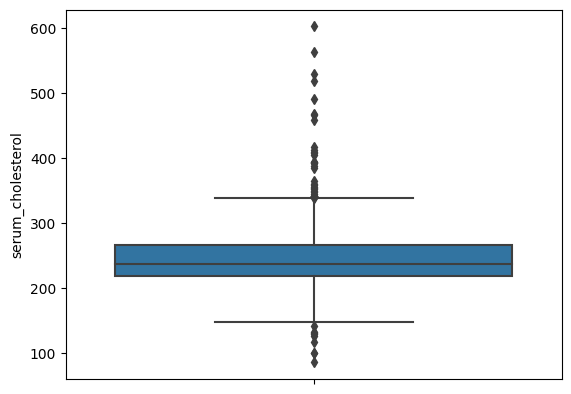

In [44]:
sns.boxplot(y='serum_cholesterol',data=df)
plt.show()

The majority of patients have serum cholesterol levels between 200 and 300 mg/dl. However, we observe outliers with values below 150 mg/dl and above 340 mg/dl

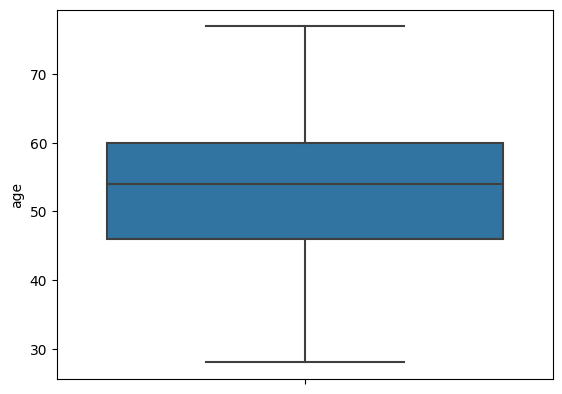

In [45]:
sns.boxplot(y='age',data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


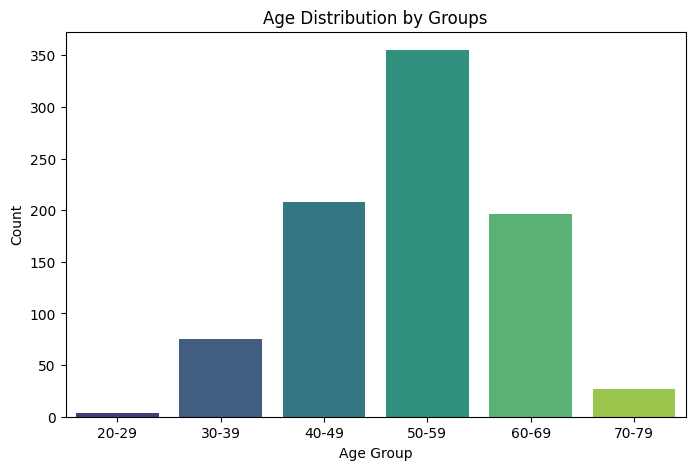

In [46]:
bins = [20, 30, 40, 50, 60, 70, 80]  
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']


df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(8,5))
sns.countplot(x='age_group', data=df, order=labels, palette='viridis')
plt.title('Age Distribution by Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The majority of patients are seniors between 50 and 59 years old. The youngest group is under 30, while the oldest are above 70. The distribution does not show any significant outliers

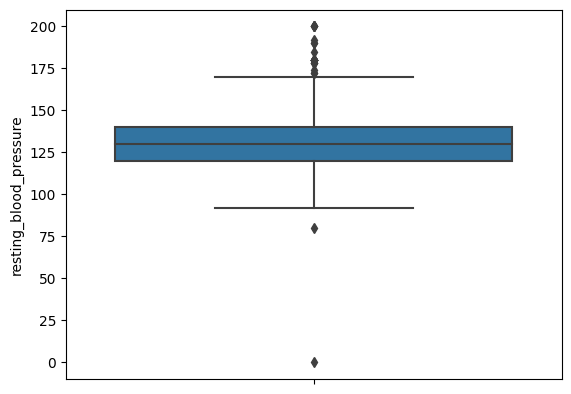

In [47]:
sns.boxplot(y='resting_blood_pressure',data=df)
plt.show()

In [48]:
Q1 = df['resting_blood_pressure'].quantile(0.25)
Q3 = df['resting_blood_pressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['resting_blood_pressure'] < lower_bound) | (df['resting_blood_pressure'] > upper_bound)]
print(outliers)

      id  age sex dataset chest_pain_type  resting_blood_pressure  \
14    15   52   M     cle              NA                   172.0   
83    84   68   M     cle              NA                   180.0   
126  127   56   F     cle             ASY                   200.0   
172  173   59   F     cle             ASY                   174.0   
183  184   59   M     cle              TA                   178.0   
188  189   54   M     cle             ATA                   192.0   
201  202   64   F     cle             ASY                   180.0   
213  214   66   F     cle             ASY                   178.0   
231  232   55   F     cle             ASY                   180.0   
338  339   39   M     Hun             ATA                   190.0   
375  376   45   F     Hun             ATA                   180.0   
387  388   46   M     Hun             ASY                   180.0   
475  476   57   F     Hun             ASY                   180.0   
484  485   59   M     Hun         

one person has 0 blood pressure it's not possible

In [49]:
df=df[df['resting_blood_pressure']!=0]

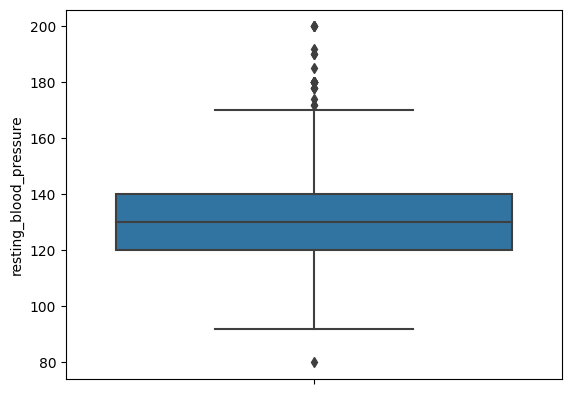

In [50]:
sns.boxplot(y='resting_blood_pressure',data=df)
plt.show()

we treated the outlier here

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


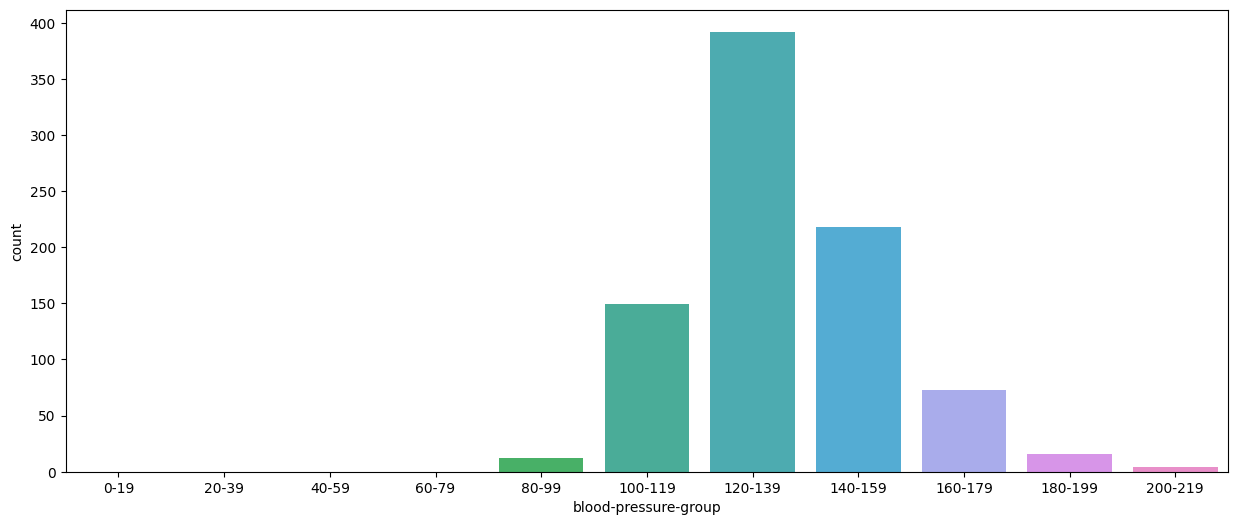

In [51]:
bins=[0,20,40,60,80,100,120,140,160,180,200,220]
labels=['0-19','20-39','40-59','60-79','80-99','100-119','120-139','140-159','160-179','180-199','200-219']
df['blood-pressure-group']=pd.cut(df['resting_blood_pressure'],bins=bins,labels=labels,right=False)
plt.figure(figsize=(15,6)) 
sns.countplot(x='blood-pressure-group',data=df,order=labels)
plt.show()

There are outliers in the resting blood pressure feature because a value of 0 is not physiologically possible. On the other hand, values above 180 mmHg are possible since some individuals can have such high blood pressure. The majority of observations fall between 120 and 139 mmHg, which is within the common range.

we treated the outlier here

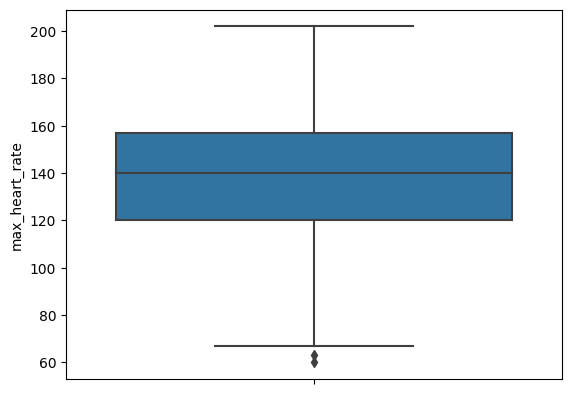

In [52]:
sns.boxplot(y='max_heart_rate',data=df)
plt.show()

The majority of patients have a maximum heart rate between 120 and 160 bpm. The minimum observed value is around 70 bpm, while the maximum exceeds 200 bpm. We can also identify some outliers with values below 70 bpm

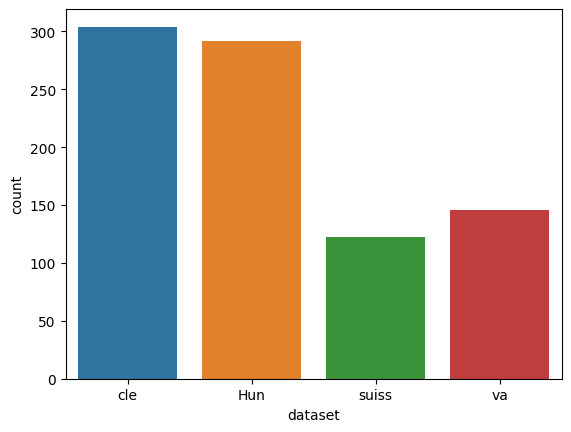

In [53]:
sns.countplot(x='dataset',data=df)
plt.show()

The majority of the data comes from Cleveland, while the least comes from Switzerland

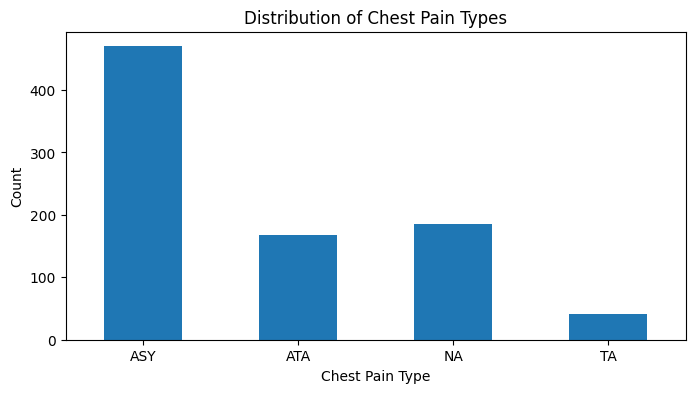

In [54]:
df['chest_pain_type'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The most common chest pain type is asymptomatic, while the least common is typical angina

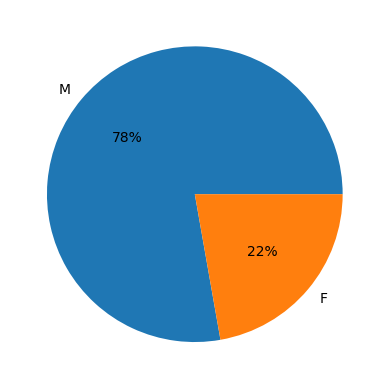

In [55]:
data=df['sex'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

Males represent the majority of patients (78%), whereas females make up just 22%

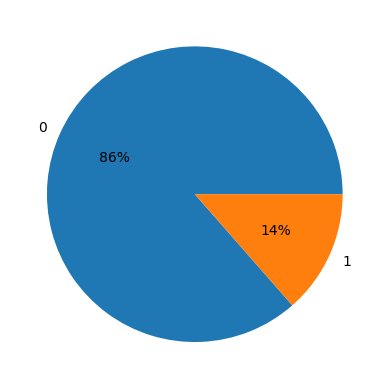

In [56]:
data=df['fasting_blood_sugar'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

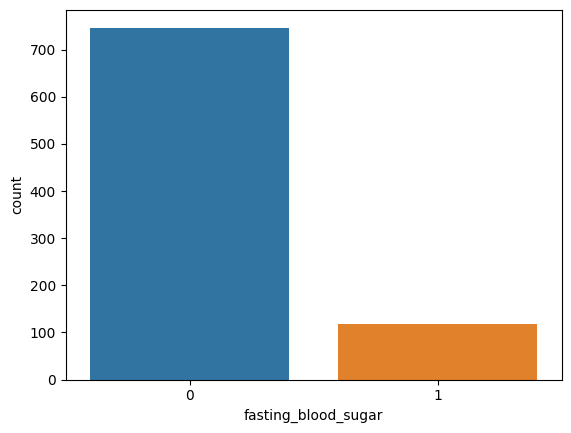

In [57]:
sns.countplot(x='fasting_blood_sugar',data=df)
plt.show()

About 86% of patients (over 700) have a blood sugar level below 120 mg/dl, while only 14% exceed this threshold

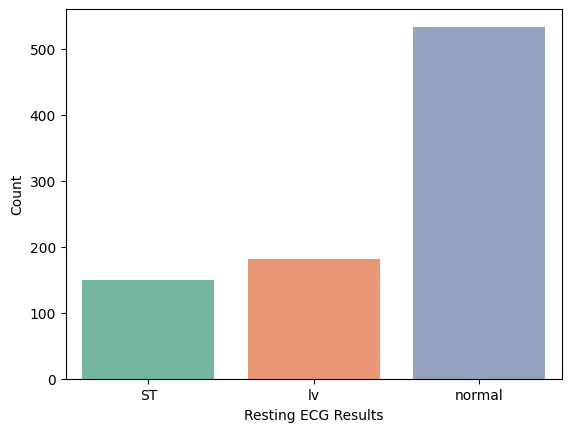

In [58]:
sns.countplot(
    x="resting_ecg_results", 
    data=df, 
    order=df['resting_ecg_results'].value_counts().sort_index().index,
    palette="Set2"
)

plt.xlabel("Resting ECG Results")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Normal resting ECG results are the most prevalent among patients, whereas left ventricular hypertrophy and ST-T abnormalities appear at comparable but significantly lower rates

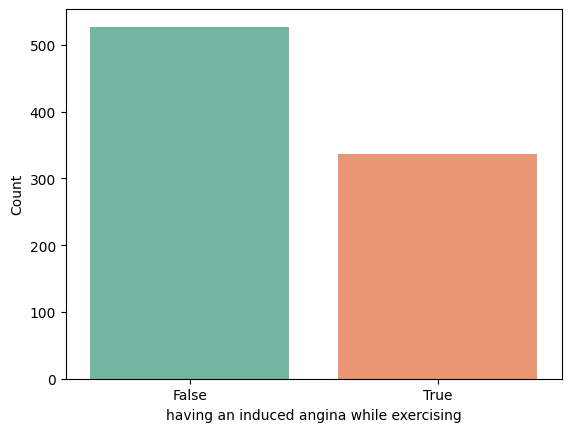

In [59]:
sns.countplot(
    x="exercise_induced_angina", 
    data=df, 
    order=df['exercise_induced_angina'].value_counts().sort_index().index,
    palette="Set2"
)

plt.xlabel("having an induced angina while exercising")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

About 500 patients did not have exercise-induced angina, while around 300 patients did

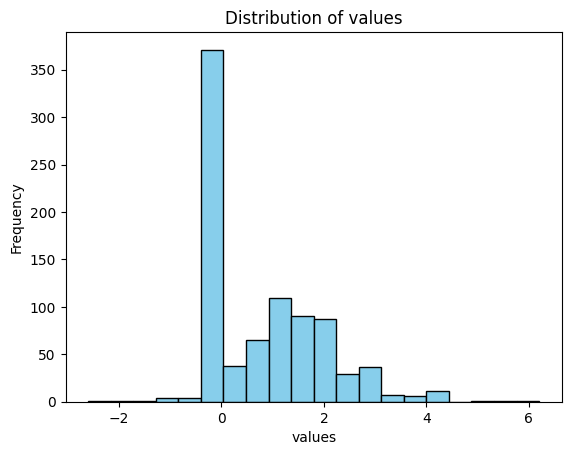

In [60]:
plt.hist(df['depression_induced_by_exercise'], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("values")
plt.ylabel("Frequency")
plt.title("Distribution of values")
plt.show()


In [61]:
df['depression_induced_by_exercise'].value_counts()


depression_induced_by_exercise
 0.0    370
 1.0     83
 2.0     75
 1.5     47
 3.0     28
 0.5     27
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 1.6     14
 0.2     14
 0.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 1.3      5
 2.2      5
 0.7      5
 1.9      5
 0.3      5
 3.6      4
 2.4      4
 1.1      4
 0.9      4
 3.4      3
 1.7      2
-1.0      2
 4.2      2
 2.3      2
 2.1      2
-0.5      2
 3.2      2
 3.5      2
-0.8      1
-0.1      1
-0.9      1
-2.0      1
-0.7      1
-2.6      1
 6.2      1
-1.5      1
-1.1      1
 5.0      1
 4.4      1
 3.8      1
 2.9      1
 5.6      1
 3.1      1
 3.7      1
Name: count, dtype: int64

The majority of patients had no ST depression during the stress test (oldpeak = 0), indicating the absence of ischemic abnormalities. Only a few patients showed high ST depression values above 3, or negative values, which are rare and less clinically common.

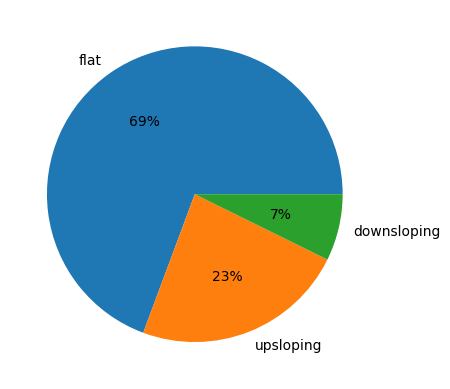

In [62]:
data=df['slope'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.f%%')
plt.show()

Regarding the slope of the peak exercise ST segment, 69% of patients show a flat slope, 23% an upsloping pattern, and only 7% a downsloping one

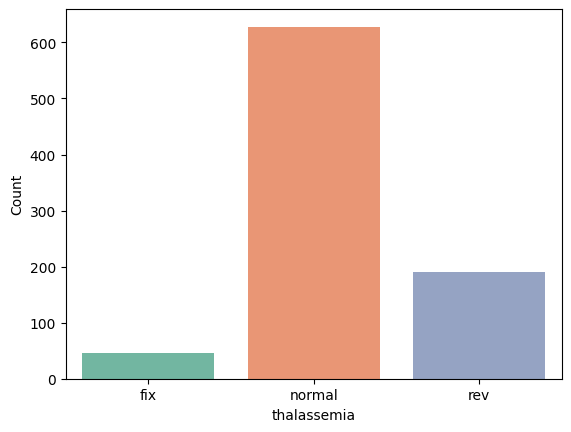

In [63]:
sns.countplot(
    x="thalassemia", 
    data=df, 
    order=df['thalassemia'].value_counts().sort_index().index,
    palette="Set2"
)

plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

About 600 patients present a normal thalassemia result, while reversible defects are less common, and fixed defects are the least frequent

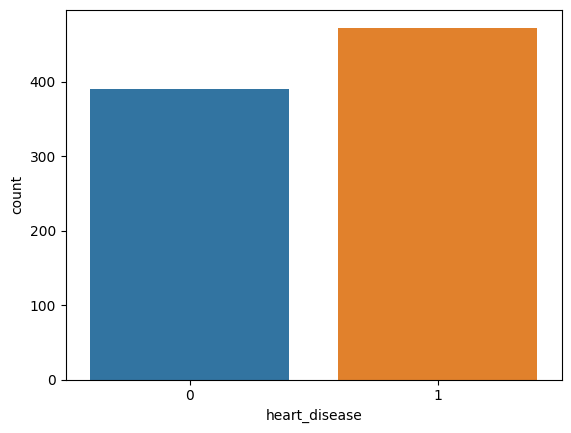

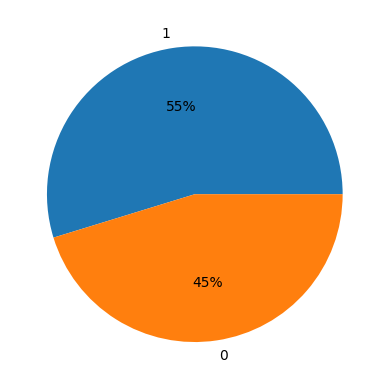

In [64]:
sns.countplot(x='heart_disease',data=df)
plt.show()
data3=df['heart_disease'].value_counts()
plt.pie(data3,labels=data3.index,autopct='%0.f%%')
plt.show()

The distribution of patients with and without heart disease appears similar, indicating a relatively balanced dataset

In [65]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)

print('Numerical Features :',*numerical_features)

Categorical Features : sex dataset chest_pain_type fasting_blood_sugar resting_ecg_results exercise_induced_angina slope thalassemia heart_disease age_group
Numerical Features : id age resting_blood_pressure serum_cholesterol max_heart_rate depression_induced_by_exercise blood-pressure-group


/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/tmp/ipykernel_36/1153477010.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)


ValueError: num must be an integer with 1 <= num <= 8, not 9

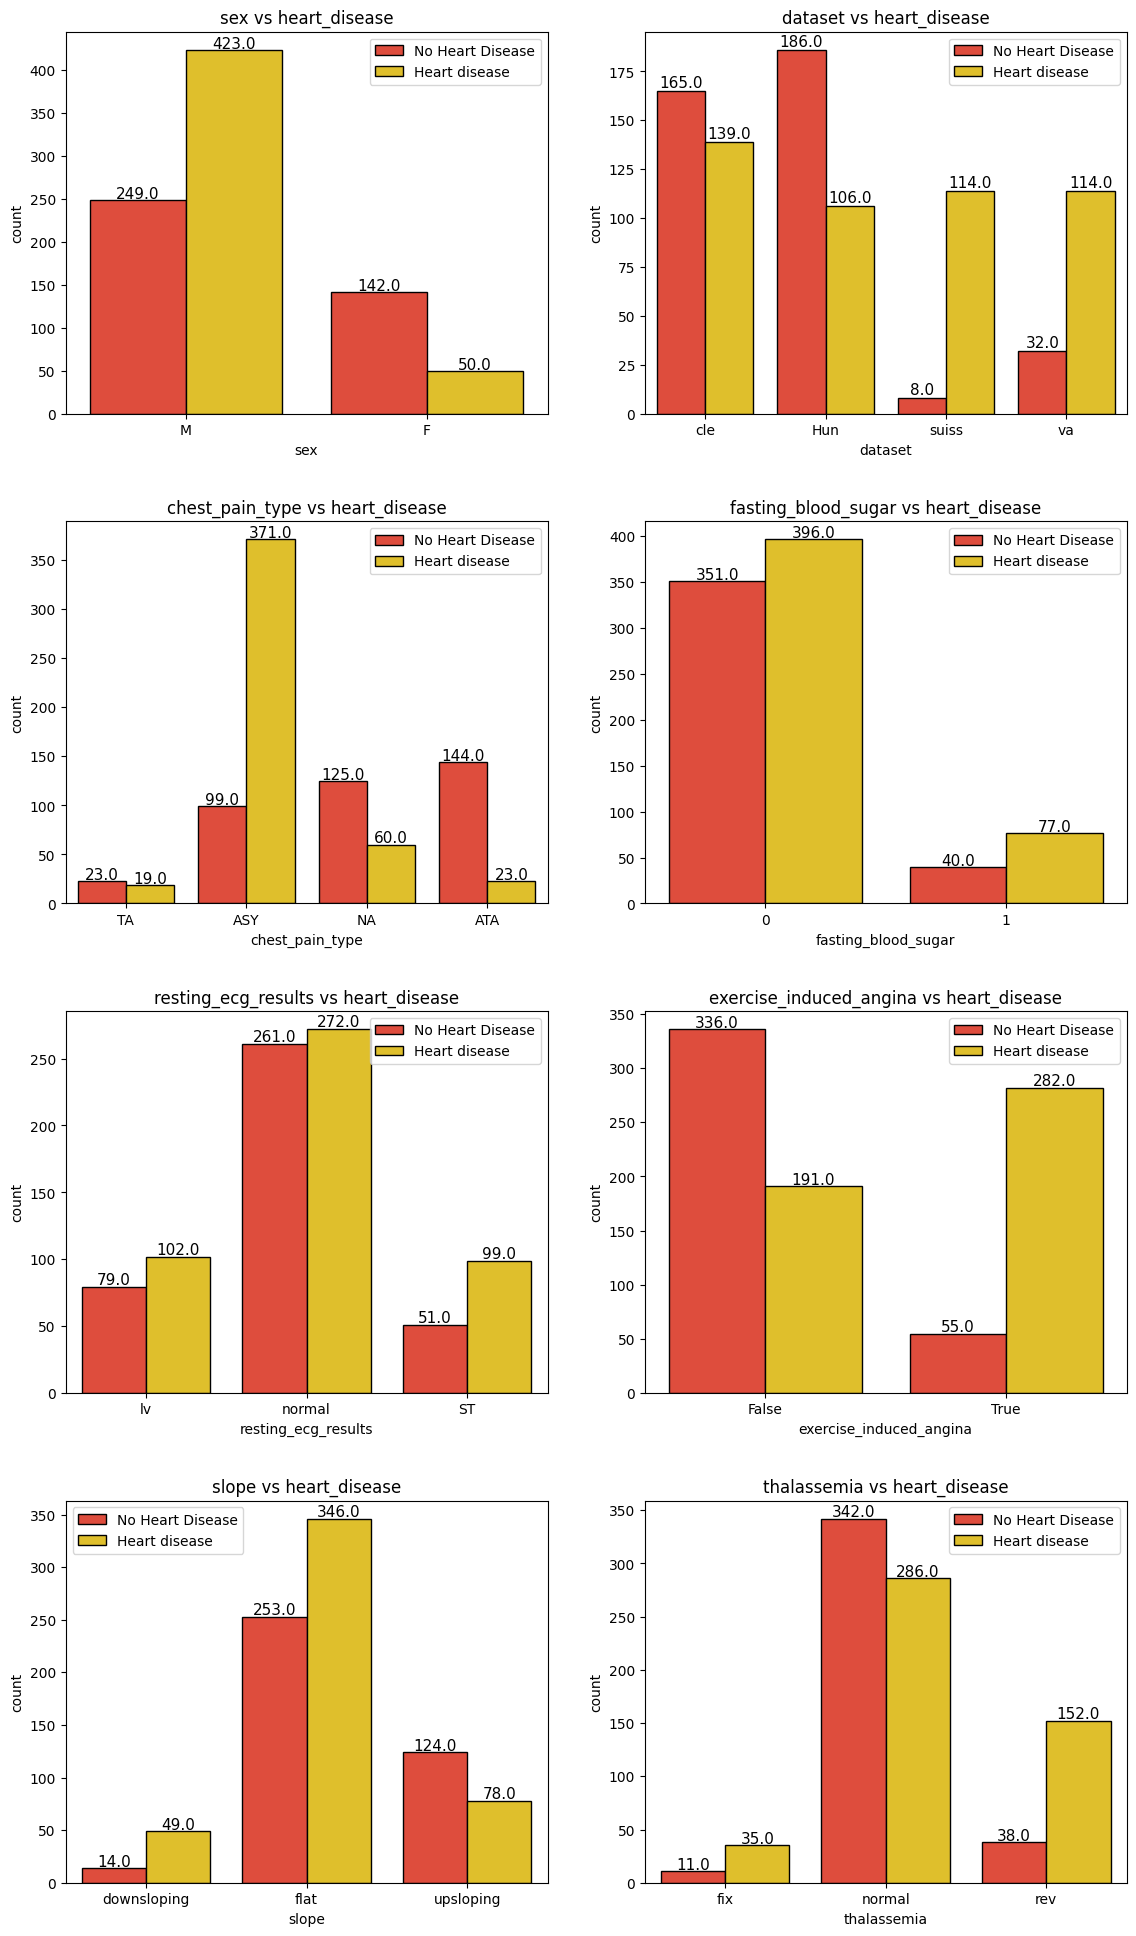

In [66]:
colors = ['#F93822','#FDD20E']
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,20))
for i in range(len(categorical_features) - 1):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(x=categorical_features[i],data = df,hue = "heart_disease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs heart_disease'
    plt.legend(['No Heart Disease','Heart disease'])
    plt.title(title);
    plt.tight_layout(pad=3.0)

*Although males are more numerous overall, the majority of them are at risk of heart disease, despite a higher absolute number appearing in the no-risk group. This indicates that, relative to their population size, males face a greater danger compared to females, who are mostly in the safer category

*Patients from Cleveland and Hungary tend to have a higher risk of heart disease, whereas in Switzerland and VA Long Beach, most patients are at lower risk, particularly in Switzerland

*Experiencing asymptomatic chest pain significantly increases the likelihood of heart disease compared to other chest pain types

*Most patients have normal resting ECG results, and overall, this feature does not show a strong effect on heart disease risk, although patients at risk are slightly more represented

*Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases

*Regarding ST_Slope, a flat slope is strongly associated with a high probability of heart disease. A down slope shows a similar pattern, although it occurs in very few patients. Conversely, an up slope appears to decrease the risk

*For thalassemia, patients with normal thalassemia tend to have a lower probability of heart disease. In contrast, those with reversible or fixed defects show an increased risk, although fixed defects are observed in only a few patients

ValueError: num must be an integer with 1 <= num <= 5, not 6

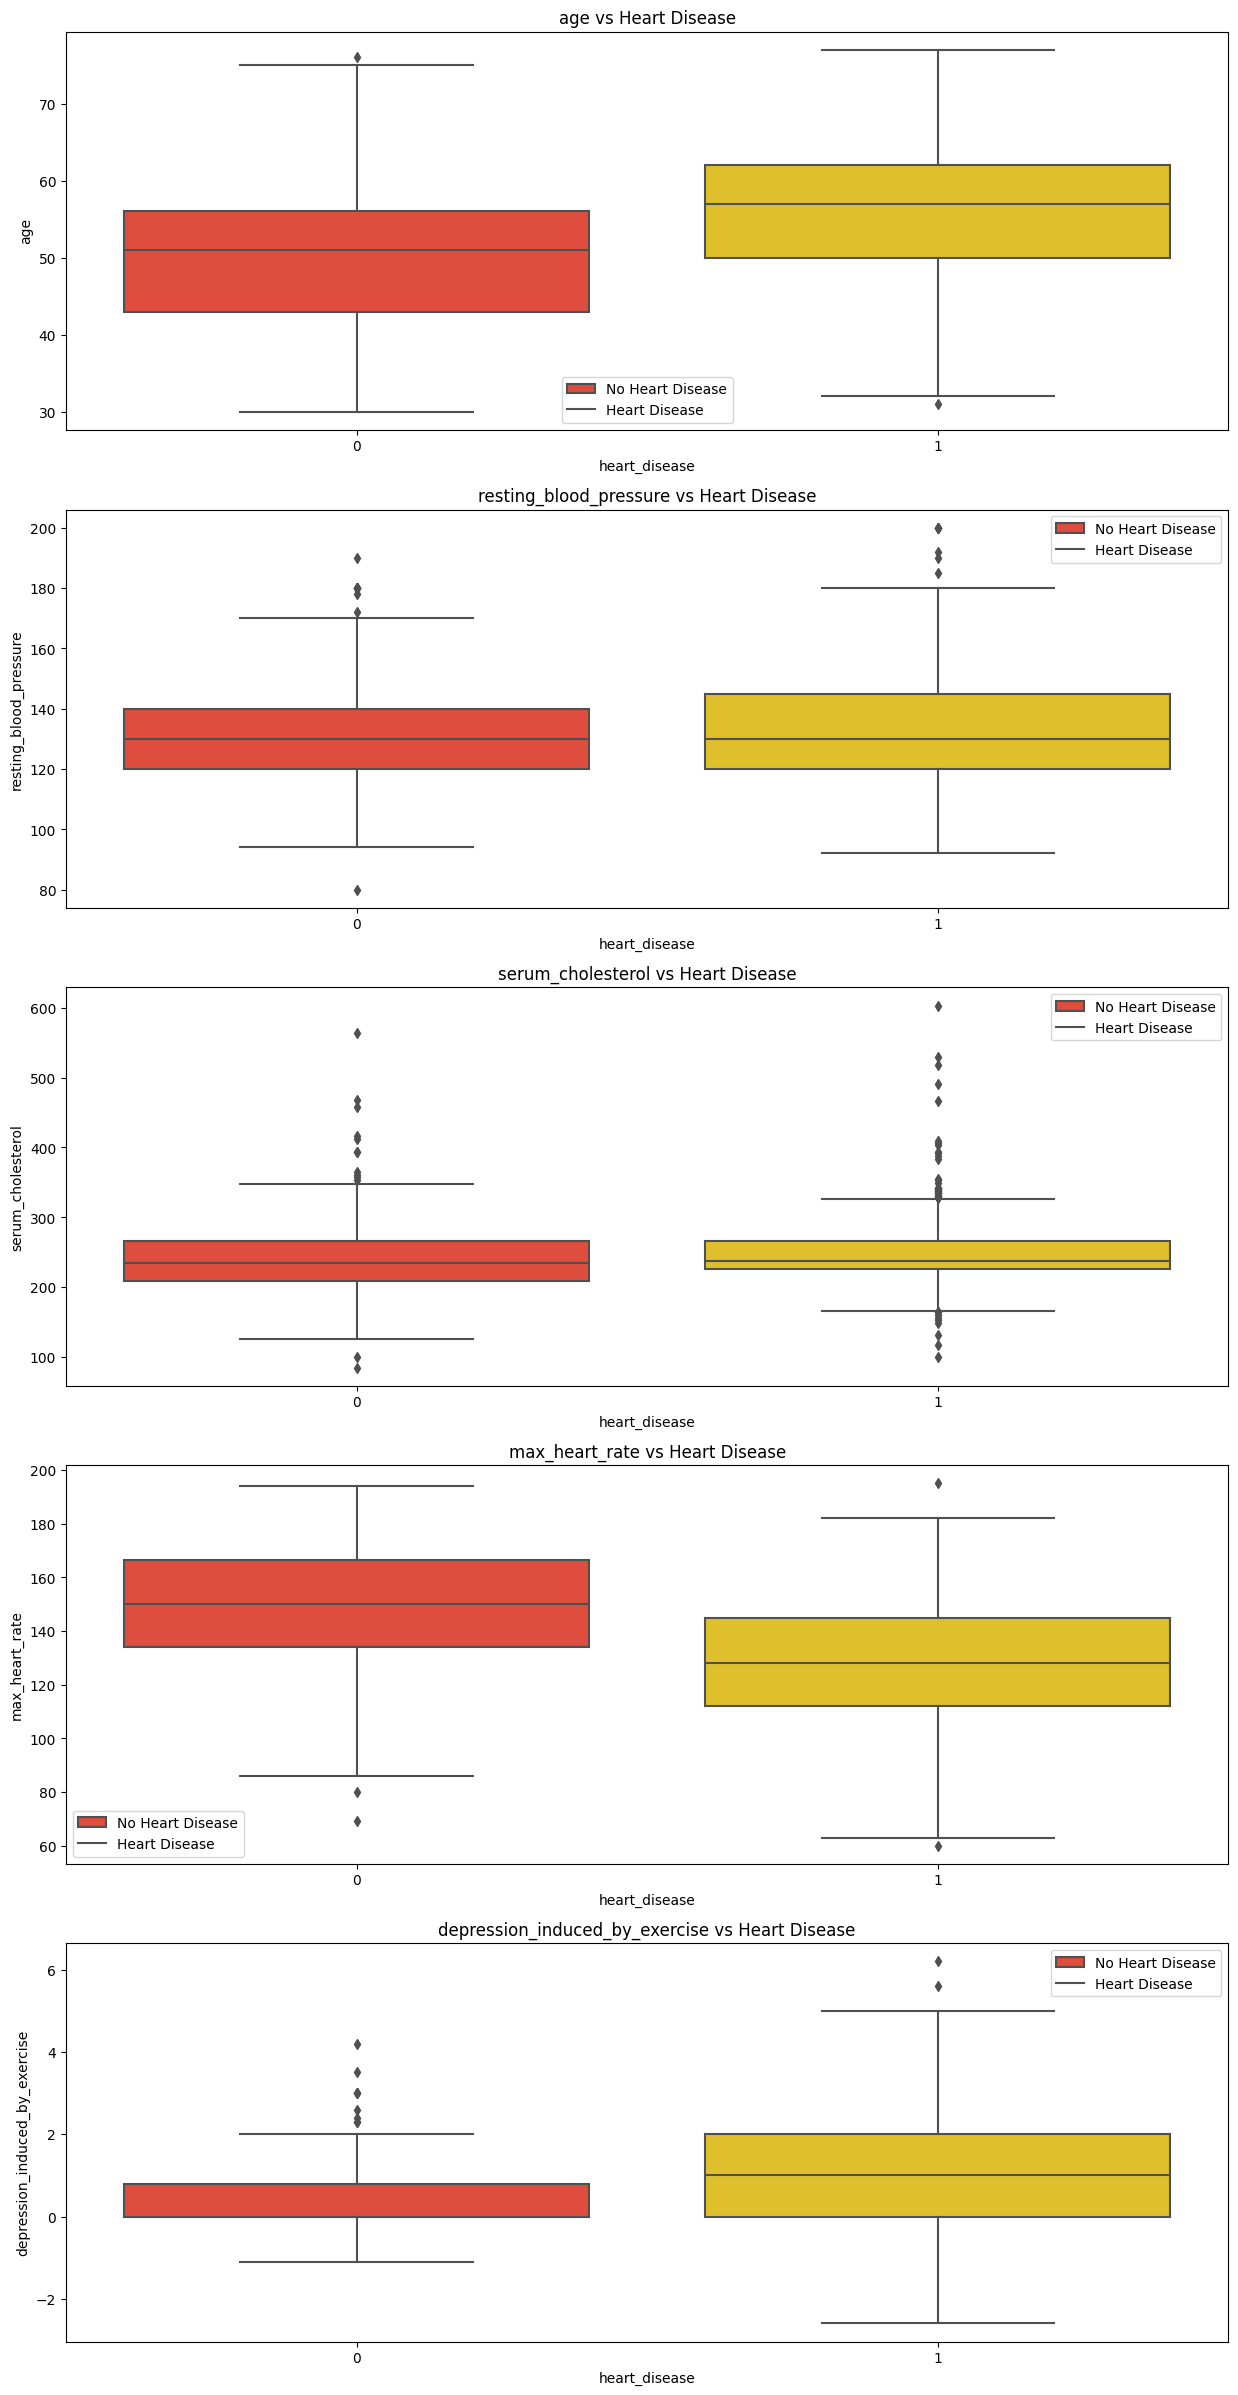

In [80]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
plot_idx = 1

for col in numerical_features:
    if col == 'id':  
        continue
    plt.subplot(5,1,plot_idx)
    sns.boxplot(y=col, data=df, x="heart_disease", palette=colors)
    title = col + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)
    plot_idx += 1

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);

In [ ]:

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'chest_pain_type',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs chest pain type' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'chest_pain_type',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs chest pain type' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'slope',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'slope',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs slope' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fasting_blood_sugar',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs fasting blood sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'fasting_blood_sugar',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs fasting blood sugar' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'resting_ecg_results',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs resting ecg' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'resting_ecg_results',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs resting ecg' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'thalassemia',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs thalassemia' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'thalassemia',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs thalassemia' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'exercise_induced_angina',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs exercise induced angina' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'exercise_induced_angina',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs exercise induced angina' 
    plt.title(title);

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'dataset',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs dataset' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'dataset',y = numerical_features[i],data = df,hue = 'heart_disease',palette = colors);

    title = numerical_features[i] + ' vs dataset' 
    plt.title(title);

In [ ]:
numerical_features = [col for col in numerical_features if col != 'id']

a = 0
fig,ax = plt.subplots(nrows = 8,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(8,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df,hue = 'heart_disease',palette = colors, edgecolor = 'black');
            
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)
            plt.tight_layout(pad=3.0)

In [ ]:
for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        if i != j and j > i:
            ct = pd.crosstab(df[categorical_features[i]], df[categorical_features[j]])
            plt.figure(figsize=(6,4))
            sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
            plt.title(f"{categorical_features[i]} vs {categorical_features[j]}")
            plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["sex", "chest_pain_type", "fasting_blood_sugar", 
                    "slope", "thalassemia", "exercise_induced_angina", 
                    "dataset", "resting_ecg_results"]

le = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:   # skip if column not in df
        df[col] = le.fit_transform(df[col])


In [68]:
df.head(10)

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,thalassemia,heart_disease,age_group,blood-pressure-group
0,1,63,1,1,3,145.0,233.0,1,1,150.0,0,2.3,0,0,0,60-69,140-159
1,2,67,1,1,0,160.0,286.0,0,1,108.0,1,1.5,1,1,1,60-69,160-179
2,3,67,1,1,0,120.0,229.0,0,1,129.0,1,2.6,1,2,1,60-69,120-139
3,4,37,1,1,2,130.0,250.0,0,2,187.0,0,3.5,0,1,0,30-39,120-139
4,5,41,0,1,1,130.0,204.0,0,1,172.0,0,1.4,2,1,0,40-49,120-139
5,6,56,1,1,1,120.0,236.0,0,2,178.0,0,0.8,2,1,0,50-59,120-139
6,7,62,0,1,0,140.0,268.0,0,1,160.0,0,3.6,0,1,1,60-69,140-159
7,8,57,0,1,0,120.0,354.0,0,2,163.0,1,0.6,2,1,0,50-59,120-139
8,9,63,1,1,0,130.0,254.0,0,1,147.0,0,1.4,1,2,1,60-69,120-139
9,10,53,1,1,0,140.0,203.0,1,1,155.0,1,3.1,0,2,1,50-59,140-159


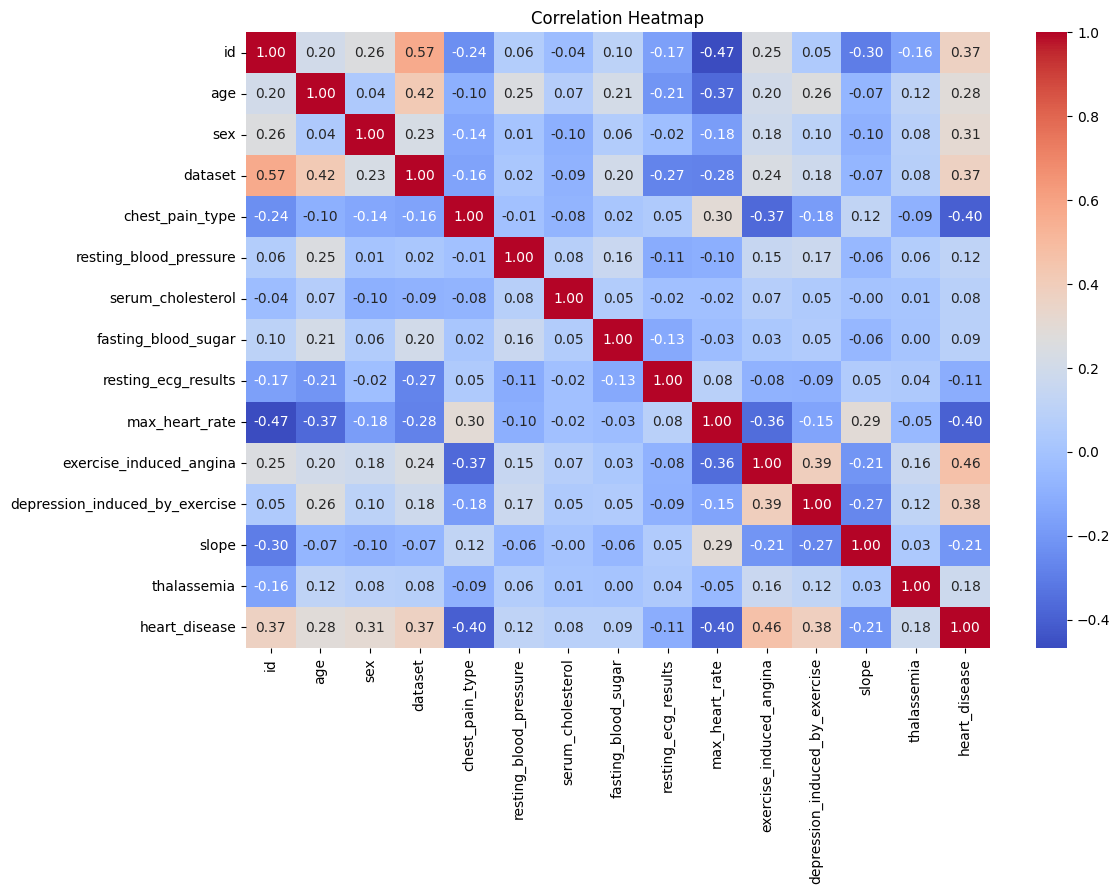

In [69]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


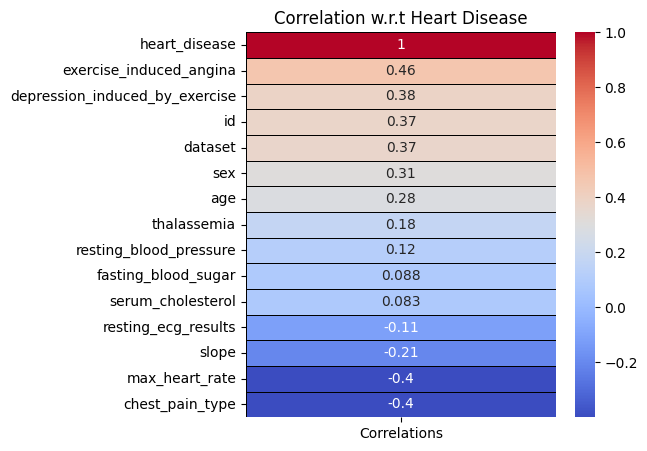

In [70]:
corr = df.select_dtypes(include=[np.number]).corrwith(df['heart_disease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.4, linecolor="black")
plt.title('Correlation w.r.t Heart Disease')
plt.show()


In [71]:
df['age_bin']=pd.cut(df['age'],bins=[29,39,49,59,69,79],labels=[1,2,3,4,5])
df['age_bin'].isna().sum()


4

In [109]:
df=df.dropna(subset=['age_bin'])

In [110]:
df['age_num']=df['age_bin'].astype(int)

In [99]:


df['age_chol']=df['age']*df['serum_cholesterol']


In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = كل المتغيرات

# 2. تدريب نموذج Lasso Logistic Regression
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_scaled, y)  # y = المتغير الهدف

# 3. عرض المتغيرات المهمة
importance = pd.Series(model.coef_[0], index=X.columns)
important_vars = importance[importance != 0].sort_values(key=abs, ascending=False)
print(important_vars)

depression_induced_by_exercise    0.811446
chest_pain_type                  -0.677740
max_heart_rate                   -0.631233
dataset                           0.553149
sex                               0.486336
thalassemia                       0.275031
h                                 0.189622
age_chol                         -0.111031
m                                -0.102202
dtype: float64


In [112]:
model = lgb.LGBMClassifier()
model.fit(X, y)

# استخراج أهمية المتغيرات
importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))

[LightGBM] [Info] Number of positive: 473, number of negative: 387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 860, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
age_chol                          1121
max_heart_rate                     834
depression_induced_by_exercise     363
dataset                            222
chest_pain_type                    210
thalassemia                         99
sex                                 87
h                                   49
m                                   15
dtype: int32


In [128]:
importance_gain = model.booster_.feature_importance(importance_type='gain')
importance_split = model.booster_.feature_importance(importance_type='split')

features = pd.DataFrame({
    'feature': X.columns,
    'split_importance': importance_split,
    'gain_importance': importance_gain
}).sort_values(by='gain_importance', ascending=False)

print(features)

                          feature  split_importance  gain_importance
8                 chest_pain_type               240      2349.438028
7                  max_heart_rate               979      1160.400310
9                        age_chol              1137      1131.379931
6                         dataset               246      1101.619695
5  depression_induced_by_exercise               447       928.320697
0                             sex               141       309.092228
4                     thalassemia               110       305.831600
1                         age_num               129       137.135916
2                               h                44        63.655933
3                               m                15        44.148981


In [133]:
df['h']=(df['resting_blood_pressure']>150).astype(int)

df['m']=(df['max_heart_rate']<120).astype(int)




X = df[['sex','age_num','h','m','thalassemia','depression_induced_by_exercise','dataset','max_heart_rate','chest_pain_type','age_chol']]
y = df['heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3️⃣ Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
}

# 4️⃣ Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")

Logistic Regression Accuracy: 84.30%
Random Forest Accuracy: 80.81%
XGBoost Accuracy: 81.40%
Gradient Boosting Accuracy: 80.23%
[LightGBM] [Info] Number of positive: 369, number of negative: 319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536337 -> initscore=0.145606
[LightGBM] [Info] Start training from score 0.145606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No